In [535]:
import torch
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


raw_data = torch.load('data/new_experiment_dataset.pth')


In [534]:
raw_data.keys()

dict_keys(['Face', 'Motorbike', 'Car', 'Duck', 'Winebottle'])

In [536]:
def plot_graph(P,G):

    nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=P)

    plt.show()


In [537]:
def get_graph(edges):
    ed = list(zip(*list(map(lambda x:(str(x[0]),str(x[1])),edges))))

    df = pd.DataFrame({ 'from':ed[0], 'to':ed[1]})

    G=nx.from_pandas_edgelist(df, 'from', 'to')
    return G

def get_triangles(G):
    triangles = [c for c in nx.cycle_basis(G) if len(c)==3]
    return triangles   

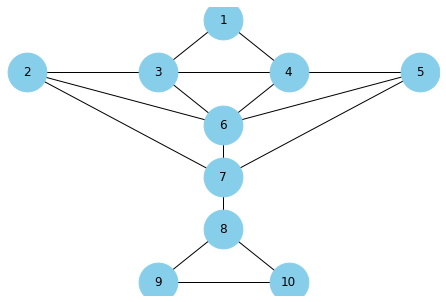

In [538]:
P1={
    '1':[0,3],
    '2':[-3,2],
    '3':[-1,2],
    '4':[1,2],
    '5':[3,2],
    '6':[0,1],
    '7':[0,0],
    '8':[0,-1],
    '9':[-1,-2],
    '10':[1,-2] 
}
E1 = [(1,3),(1,4),(3,4),(4,5),(5,6),(4,6),(3,6),(2,3),(2,6),(2,7),(5,7),(6,7),(7,8),(8,9),(9,10),(8,10)]
T1 = [[6,7,8]]
G1 = get_graph(E1)
plot_graph(P1,G1)

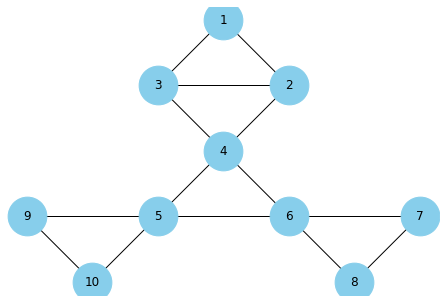

In [539]:
P2={
    '1':[0,2],
    '2':[1,1],
    '3':[-1,1],
    '4':[0,0],
    '5':[-1,-1],
    '6':[1,-1],
    '7':[3,-1],
    '8':[2,-2],
    '9':[-3,-1],
    '10':[-2,-2] 
}
E2 = [(1,3),(1,2),(3,2),(3,4),(2,4),(4,5),(4,6),(5,6),(5,9),(5,10),(9,10),(6,8),(6,7),(7,8)]
G2 = get_graph(E2)
T2 = []
plot_graph(P2,G2)

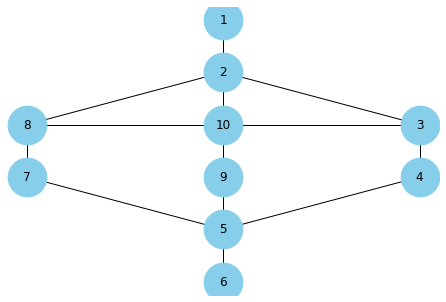

In [540]:
P3={
    '1':[0,2],
    '2':[0,1],
    '3':[1,0],
    '4':[1,-1],
    '5':[0,-2],
    '6':[0,-3],
    '7':[-1,-1],
    '8':[-1,0],
    '9':[0,-1],
    '10':[0,0] 
}
E3= [(1,2),(2,3),(3,4),(4,5),(5,6),(5,7),(7,8),(8,2),(2,10),(10,9),(9,5),(3,10),(8,10)]
G3 = get_graph(E3)
T3 = [[1,2,10],[9,5,6]] 
plot_graph(P3,G3)

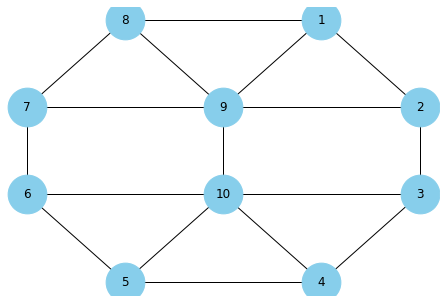

In [541]:
P4={
    '1':[1,2],
    '2':[2,1],
    '3':[2,0],
    '4':[1,-1],
    '5':[-1,-1],
    '6':[-2,0],
    '7':[-2,1],
    '8':[-1,2],
    '9':[0,1],
    '10':[0,0] 
}
E4= [(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,1),(8,9),(9,10),(1,9),(2,9),(3,10),(4,10),(5,10),(6,10),(7,9)]
G4 = get_graph(E4)
T4 = []
plot_graph(P4,G4)

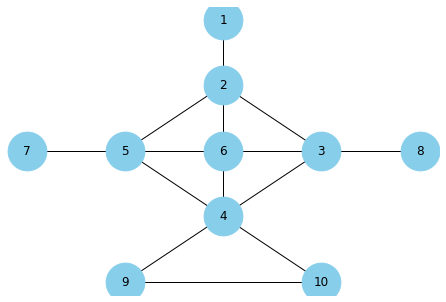

In [542]:
P5={
    '1':[0,2],
    '2':[0,1],
    '3':[1,0],
    '4':[0,-1],
    '5':[-1,0],
    '6':[0,0],
    '7':[-2,0],
    '8':[2,0],
    '9':[-1,-2],
    '10':[1,-2] 
}
E5= [(1,2),(2,3),(3,4),(4,5),(5,6),(5,7),(5,2),(2,6),(3,6),(3,8),(4,6),(4,9),(4,10),(9,10)]
G5= get_graph(E5)
T5 = [[1,2,6],[7,5,6],[8,3,4]]
plot_graph(P5,G5)

In [543]:
import math
import numpy as np
def calcDist(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

def triang2const(p):
    ab = calcDist(p[0],p[1])
    bc = calcDist(p[1],p[2])
    ca = calcDist(p[2],p[0])
    max_d = np.max([ab,bc,ca])
    return (ab/max_d,bc/max_d,ca/max_d)
def trip2const(p):
    ab = calcDist(p[0],p[1])
    bc = calcDist(p[1],p[2])
    max_d = np.max([ab,bc])
    return (ab/max_d,bc/max_d)

def get_constraints(triangles,triples,P):
    triangle_c = []
    triple_c = []
    for t in triangles:
        points = [P[str(i)] for i in t]
        const = triang2const(points)
        triangle_c.append((t,const,points)) 
    for t in triples:
        points = [P[str(i)] for i in t]
        const = trip2const(points)
        triple_c.append((t,const,points))
    return triangle_c,triple_c



In [544]:
graphs = [G1,G2,G3,G4,G5]
triples = [T1,T2,T3,T4,T5]
positions = [P1,P2,P3,P4,P5]

In [545]:
constraints_per_graph = []
for i in range(len(graphs)):
    constraints_per_graph.append(get_constraints(get_triangles(graphs[i]),triples[i],positions[i]))


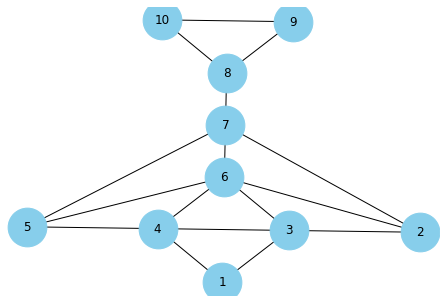

In [546]:
theta = np.radians(179)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
new_P = {}
for k,p in P1.items():
    new_P[k] = np.dot(R,p)
plot_graph(new_P,G1)

In [547]:
import random

def rand_rot(ps):
    mu, sigma = 0, 60 # mean and standard deviation
    angle = np.random.normal(mu, sigma, 1)
    theta = np.radians(angle[0])
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    new_P = []
    for p in ps:
        new_P.append(np.dot(R,p))
    return new_P

def rand_scale(ps):
    s = np.random.uniform(6,100)
    S = np.array(((s, 0), (0, s)))
    new_P = []
    for p in ps:
        new_P.append(np.dot(S,p))
    return new_P

def rand_trans(ps):
    xs,ys = list(zip(*ps))
    max_t1,min_t1 = 300-max(xs),-300-min(xs)
    max_t2,min_t2 = 300-max(ys),-300-min(ys)  
    t1,t2 = np.random.uniform(min_t1,max_t1),np.random.uniform(min_t2,max_t2)
    new_P = []
    for p in ps:
        new_P.append([p[0]+t1,p[1]+t2])
    return new_P

def get_features(clas):
    keypoints = raw_data[list(raw_data.keys())[clas]]
    choosed = []
    for i in range(10):
        choosed.append(random.choice(keypoints[i]))
    return choosed


def get_random_points(clas):
    keypoints = raw_data[list(raw_data.keys())[clas]][10]
    choosed = []
    for i in range(100):
        keypoint = random.choice(keypoints)
        position = [np.random.uniform(-300,300),np.random.uniform(-300,300)]
        choosed.append((position,keypoint,False))
    return choosed

def get_example_for_class(clas):
    coords = list(positions[clas].values())
    r = rand_rot(coords)
    sr = rand_scale(r)
    tsr = rand_trans(sr)
    features = get_features(clas)
    random_points = get_random_points(clas)
    points_for_example = {'class':clas,'points':[(tsr[i],features[i],True) for i in range(10) if np.random.binomial(1,0.8) ] + random_points}
    return points_for_example

In [548]:
from tqdm import tqdm
examples = []
# for every class
for i in tqdm(range(5)):
    # generate 200 examples
    for j in range(200):
        examples.append(get_example_for_class(i))



100%|██████████| 5/5 [00:00<00:00,  6.45it/s]


In [549]:
with open('data/test.pth','wb') as f:
    torch.save(examples,f)

In [562]:
int(random.uniform(0,40))

0

In [563]:
features_per_class = []
for v in raw_data.values():
    features = []
    for f in v[:10]:
        features.append(f[int(random.uniform(0,40))])
    features_per_class.append(features)

In [564]:
import pickle
with open('data/constraint.pkl','wb') as f:
    pickle.dump({'constraints':constraints_per_graph,'features':features_per_class},f)

In [323]:
#l2r,r2l == leaf to root, root to leaf


NameError: name 'prot1' is not defined

1. each p_i gives vote v_ijk to to each q_jk, where i indexes number of points, j number of prototypes and k number of points in prototype j

2. if v_ijk > thresh1, add link e_ijk from q_jk to p_i with weight v_ijk

3. for each q_jk get the max weight v_ijk and propagate it to relations r_kn it is part of by a message mr_jkn.

4. For each rel r_kn sum the incomming messages mr_jkn. If the sum is bellow some threshold, discard this relation.

5. For the relations that were above some threshold, send a message to their prototypes mp_kn.

5. for each prototype k, sum the messages mp_kn. If its bellow some threshold, discard the prototype and also the relations with the points q_jk.

6. for rels that remained find the best assignment for each rel, to get a score for this rel.

7. propagate the scores to the prototypes to see if they are above some threshold. Discard the prototypes which are below some threshold

8. for the remaining prototypes and relations, find the best match and get its score.

9. choose the prototype with the best score.
